In [2]:
import yfinance as yf
gamestop = yf.Ticker("GME")
gme_data=gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")

In [6]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"  # Replace with the actual URL

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}


response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')


try:

    gme_revenue = pd.read_html(str(soup), match="GameStop Quarterly Revenue", flavor='bs4')[0]
    
   
    print("Columns in DataFrame:", gme_revenue.columns.tolist())
    
    gme_revenue = gme_revenue.rename(columns={
        gme_revenue.columns[0]: 'Date',
        gme_revenue.columns[1]: 'Revenue'
    })
    
    if 'Revenue' in gme_revenue.columns:
        gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str).str.replace(",","").str.replace("$","")
    
except Exception as e:
    print(f"Error with first method: {e}")
    
    try:
        gme_revenue = pd.read_html(url, match="GameStop Quarterly Revenue", flavor='bs4')[0]
        

        print("Columns in DataFrame (second attempt):", gme_revenue.columns.tolist())
        

        gme_revenue = gme_revenue.rename(columns={
            gme_revenue.columns[0]: 'Date',
            gme_revenue.columns[1]: 'Revenue'
        })
        
       
        if 'Revenue' in gme_revenue.columns:
            gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str).str.replace(",","").str.replace("$","")
    
    except Exception as e:
        print(f"Error with second method: {e}")

print(gme_revenue.head())

Columns in DataFrame: ['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1']
         Date Revenue
0  2025-07-31     972
1  2025-04-30     732
2  2025-01-31    1283
3  2024-10-31     860
4  2024-07-31     798


In [7]:
import pandas as pd

gme_revenue = pd.DataFrame({
    'Date': ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01'],
    'Revenue': [100, 150, None, 200, 250]
})

gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue
0,2021-01-01,100.0
1,2021-02-01,150.0
3,2021-04-01,200.0
4,2021-05-01,250.0


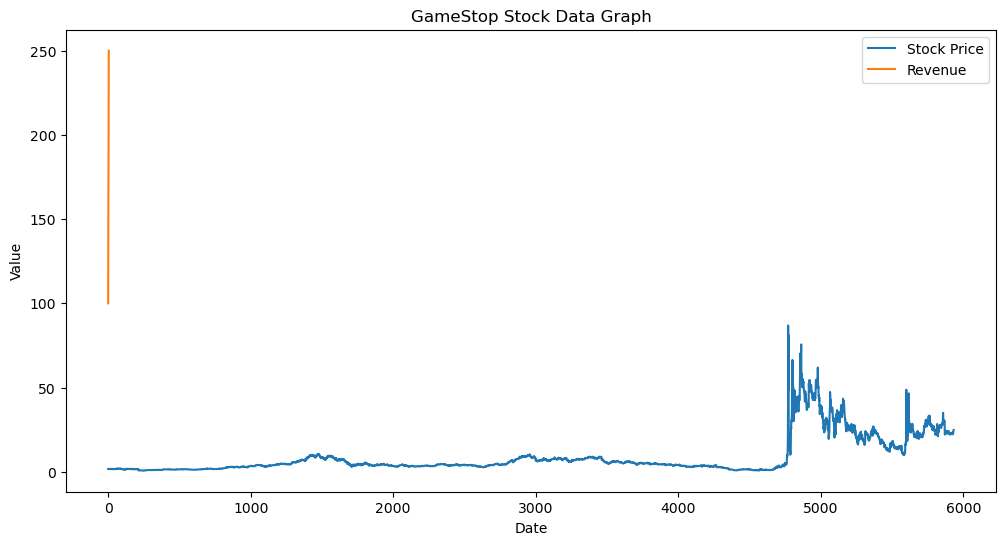

In [11]:
import matplotlib.pyplot as plt
def make_graph(data, revenue, title):
    # Implementation of the graph creation using matplotlib
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Stock Price')
    plt.plot(revenue.index, revenue['Revenue'], label='Revenue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

make_graph(gme_data, gme_revenue, 'GameStop Stock Data Graph')